In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import numpy as np

## Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [3]:
# Reading data from link
raw_data = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data").content
data = pd.read_csv(io.StringIO(raw_data.decode('utf-8')))
data.columns.values.tolist()

['p',
 'x',
 's',
 'n',
 't',
 'p.1',
 'f',
 'c',
 'n.1',
 'k',
 'e',
 'e.1',
 's.1',
 's.2',
 'w',
 'w.1',
 'p.2',
 'w.2',
 'o',
 'p.3',
 'k.1',
 's.3',
 'u']

In [4]:
#Finding all rows with missing vals. According to the doc, missing values are added as ?
# Doc said all ? were at feature 12, but help finding it when I don't know where all of them are?
data[data['e.1'] == '?']

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
3983,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4022,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4075,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4099,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4103,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
# finding poisonous shroom ratio per habitat
poisonous =data[data['p']=='p']
habitat_poisonous_ratio = [poisonous[poisonous['u']=='g'].shape[0]/data[data['u']=='g'].shape[0], 
                           poisonous[poisonous['u']=='l'].shape[0]/data[data['u']=='l'].shape[0],
                           poisonous[poisonous['u']=='m'].shape[0]/data[data['u']=='m'].shape[0],
                           poisonous[poisonous['u']=='p'].shape[0]/data[data['u']=='p'].shape[0],
                           poisonous[poisonous['u']=='u'].shape[0]/data[data['u']=='u'].shape[0],
                           poisonous[poisonous['u']=='w'].shape[0]/data[data['u']=='w'].shape[0],
                           poisonous[poisonous['u']=='d'].shape[0]/data[data['u']=='d'].shape[0]]
# no poisonous shrooms in waste... noted...
habitat_poisonous_ratio


[0.34450651769087526,
 0.7115384615384616,
 0.1232876712328767,
 0.8811188811188811,
 0.7384196185286104,
 0.0,
 0.4027954256670902]

In [6]:
data_dummied = pd.get_dummies(data)

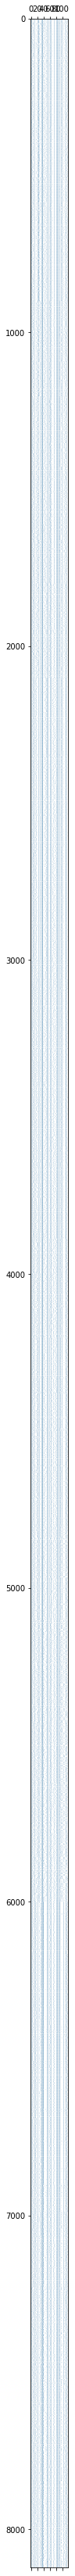

In [7]:
plt.spy(data_dummied,markersize = 0.02)
fig = plt.gcf()
fig.set_size_inches(60,60)
plt.plot()
plt.show()